# How this notebook is laid out

1) First load required packages
2) Run 10 instances of UCS (cell 4) and A* (cell 5) using warehouse_env with reset(randomize=True)
3) Compare and print statistics

Cell 4 and 5 need not be run manually as cell 2 invokes them.


In [1]:
# Verify required packages are available
import sys
print(f"Python version: {sys.version}")

try:
    import numpy as np
    print(f"✓ numpy {np.__version__} is available")
except ImportError as e:
    print(f"✗ numpy not available: {e}")

try:
    import matplotlib.pyplot as plt
    print("✓ matplotlib is available")
except ImportError as e:
    print(f"✗ matplotlib not available: {e}")

print("All required packages are ready!")

Python version: 3.12.12 (main, Oct  9 2025, 11:07:00) [Clang 17.0.0 (clang-1700.6.3.2)]
✓ numpy 2.4.1 is available
✓ matplotlib is available
All required packages are ready!


SEARCH ALGORITHM COMPARISON: UCS vs A*
Running UCS for 10 episodes...
  Completed 5/10 episodes
  Completed 10/10 episodes
Running A* for 10 episodes...
  Completed 5/10 episodes
  Completed 10/10 episodes

STATISTICAL ANALYSIS RESULTS

UCS Algorithm Results:
----------------------------------------
  Success Rate: 100.0%
  Mean Path Length (successful): 11.0
  Median Path Length (successful): 11.0
  Mean Nodes Expanded: 62.0
  Median Nodes Expanded: 62.0
  Mean Computation Time: 0.000239s
  Median Computation Time: 0.000234s

A* Algorithm Results:
----------------------------------------
  Success Rate: 100.0%
  Mean Path Length (successful): 13.0
  Median Path Length (successful): 12.5
  Mean Nodes Expanded: 27.9
  Median Nodes Expanded: 29.5
  Mean Computation Time: 0.000142s
  Median Computation Time: 0.000147s

PERFORMANCE COMPARISON
A* expands 2.22x fewer nodes than UCS on average
A* is 1.68x faster than UCS on average
Path length difference: 2.0 steps


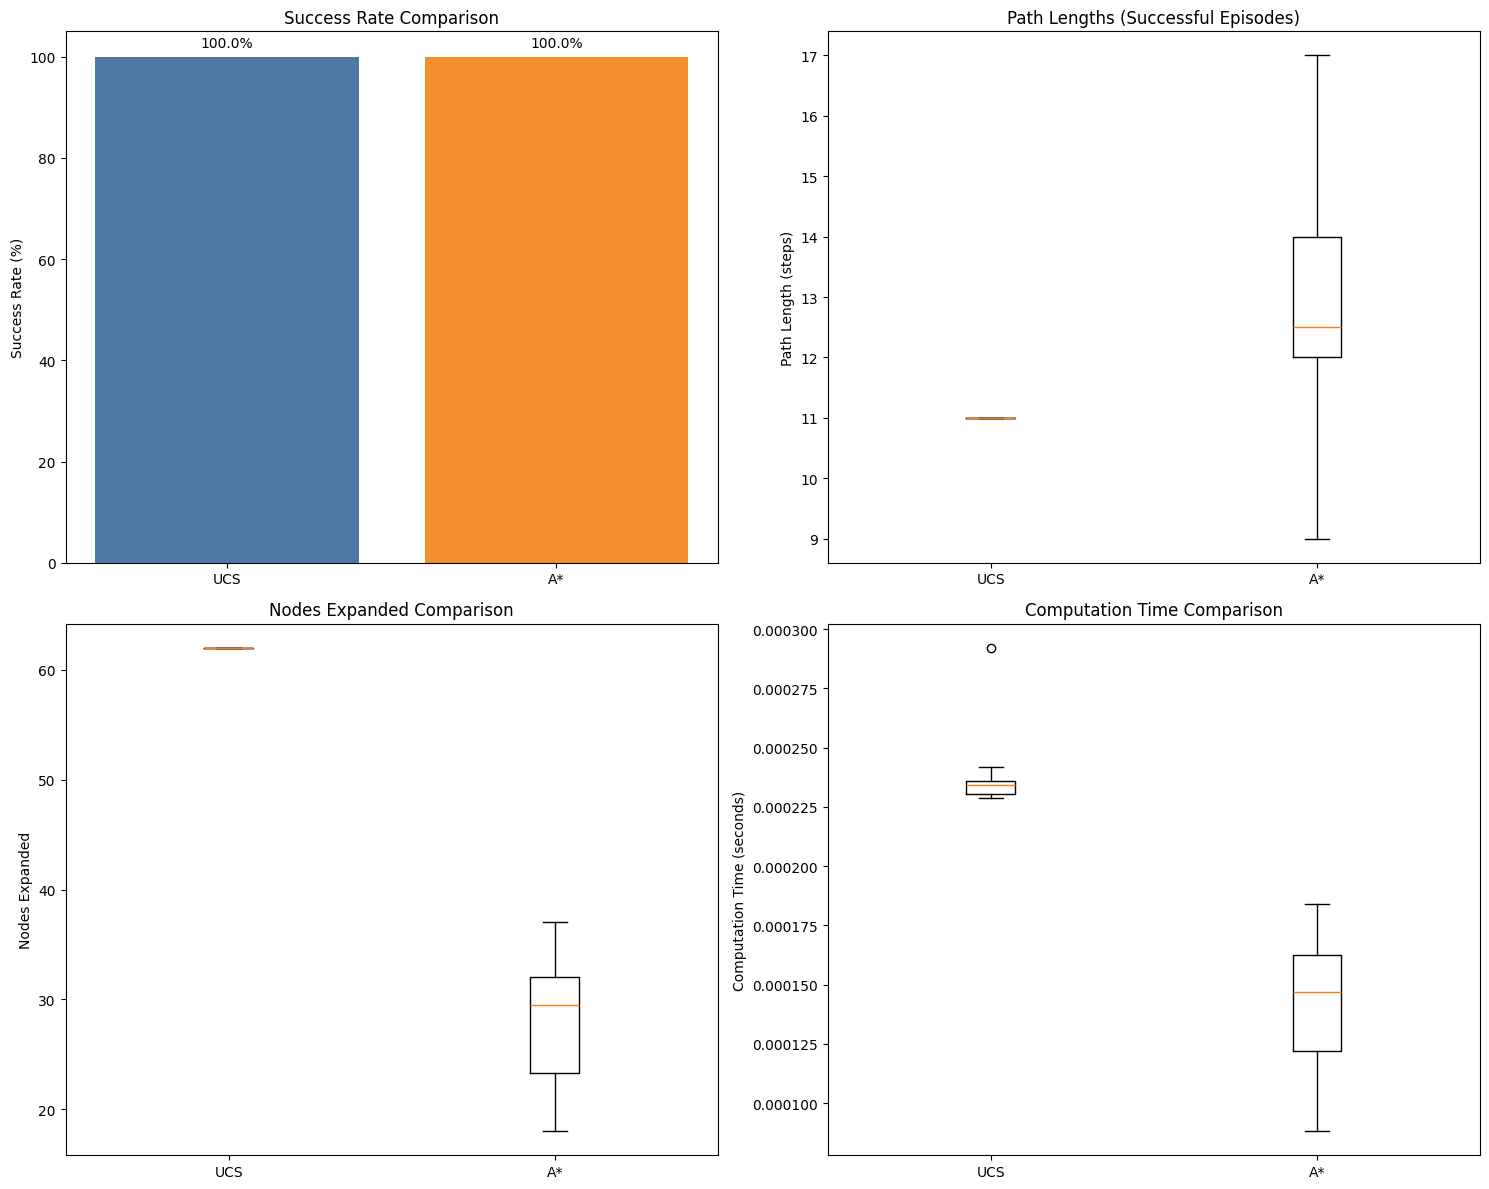

In [13]:
# Multi-Episode Comparison: UCS vs A* Search Algorithms
# This cell runs both UCS and A* algorithms 10 times each and compares their performance

# Function to run multiple episodes and collect statistics
def run_search_episodes(search_function, search_name, num_episodes=10):
    """Run search algorithm multiple times and collect statistics"""
    stats = {
        'success': [],
        'path_length': [],
        'nodes_expanded': [],
        'computation_time': []
    }
    
    print(f"Running {search_name} for {num_episodes} episodes...")
    
    for episode in range(num_episodes):
        env = WarehouseEnv()
        result = search_function(env)
        
        stats['success'].append(1 if result['success'] else 0)
        stats['path_length'].append(result['path_length'] if result['success'] else 0)
        stats['nodes_expanded'].append(result['nodes_expanded'])
        stats['computation_time'].append(result['computation_time'])
        
        if (episode + 1) % 5 == 0:
            print(f"  Completed {episode + 1}/{num_episodes} episodes")
    
    return stats

# Function to analyze statistics (similar to existing analyze_stats function)
def analyze_search_stats(stats, search_name):
    """Analyze and return summary statistics"""
    success_arr = np.array(stats['success'])
    path_length_arr = np.array(stats['path_length'])
    nodes_expanded_arr = np.array(stats['nodes_expanded'])
    computation_time_arr = np.array(stats['computation_time'])
    
    success_rate = success_arr.mean()
    
    # Only consider successful episodes for path length statistics
    successful_paths = path_length_arr[success_arr == 1]
    mean_path_length = successful_paths.mean() if len(successful_paths) > 0 else float('nan')
    median_path_length = np.median(successful_paths) if len(successful_paths) > 0 else float('nan')
    
    # Nodes expanded and computation time for all episodes
    mean_nodes_expanded = nodes_expanded_arr.mean()
    median_nodes_expanded = np.median(nodes_expanded_arr)
    mean_computation_time = computation_time_arr.mean()
    median_computation_time = np.median(computation_time_arr)
    
    return {
        'search_name': search_name,
        'success_rate': success_rate,
        'mean_path_length': mean_path_length,
        'median_path_length': median_path_length,
        'mean_nodes_expanded': mean_nodes_expanded,
        'median_nodes_expanded': median_nodes_expanded,
        'mean_computation_time': mean_computation_time,
        'median_computation_time': median_computation_time
    }

# Function to plot comparison (similar to existing plot_comparison function)
def plot_search_comparison(ucs_stats, astar_stats):
    """Plot comparison between UCS and A* statistics"""
    labels = ['UCS', 'A*']
    
    # Success rates
    success_rates = [
        np.array(ucs_stats['success']).mean(),
        np.array(astar_stats['success']).mean()
    ]
    
    # Path lengths for successful episodes only
    ucs_successful_paths = np.array(ucs_stats['path_length'])[np.array(ucs_stats['success']) == 1]
    astar_successful_paths = np.array(astar_stats['path_length'])[np.array(astar_stats['success']) == 1]
    path_data = [ucs_successful_paths, astar_successful_paths]
    
    # Nodes expanded for all episodes
    nodes_data = [ucs_stats['nodes_expanded'], astar_stats['nodes_expanded']]
    
    # Computation time for all episodes
    time_data = [ucs_stats['computation_time'], astar_stats['computation_time']]
    
    fig, axs = plt.subplots(2, 2, figsize=(15, 12))
    
    # Success rate bar chart
    axs[0,0].bar(labels, [100 * s for s in success_rates], color=['#4e79a7', '#f28e2b'])
    axs[0,0].set_ylabel('Success Rate (%)')
    axs[0,0].set_title('Success Rate Comparison')
    for i, v in enumerate(success_rates):
        axs[0,0].text(i, 100 * v + 2, f"{100*v:.1f}%", ha='center')
    
    # Path length box plot
    axs[0,1].boxplot(path_data, tick_labels=labels)
    axs[0,1].set_ylabel('Path Length (steps)')
    axs[0,1].set_title('Path Lengths (Successful Episodes)')
    
    # Nodes expanded box plot
    axs[1,0].boxplot(nodes_data, tick_labels=labels)
    axs[1,0].set_ylabel('Nodes Expanded')
    axs[1,0].set_title('Nodes Expanded Comparison')
    
    # Computation time box plot
    axs[1,1].boxplot(time_data, tick_labels=labels)
    axs[1,1].set_ylabel('Computation Time (seconds)')
    axs[1,1].set_title('Computation Time Comparison')
    
    plt.tight_layout()
    plt.show()

# Main execution: Run UCS and A* multiple times and compare
print("=" * 60)
print("SEARCH ALGORITHM COMPARISON: UCS vs A*")
print("=" * 60)

NUM_EPISODES = 10

# Run UCS episodes
ucs_stats = run_search_episodes(uniform_cost_search, "UCS", NUM_EPISODES)

# Run A* episodes  
astar_stats = run_search_episodes(a_star_search, "A*", NUM_EPISODES)

print("\n" + "=" * 60)
print("STATISTICAL ANALYSIS RESULTS")
print("=" * 60)

# Analyze results
ucs_analysis = analyze_search_stats(ucs_stats, "UCS")
astar_analysis = analyze_search_stats(astar_stats, "A*")

# Print detailed comparison
for analysis in [ucs_analysis, astar_analysis]:
    print(f"\n{analysis['search_name']} Algorithm Results:")
    print("-" * 40)
    print(f"  Success Rate: {analysis['success_rate']*100:.1f}%")
    print(f"  Mean Path Length (successful): {analysis['mean_path_length']:.1f}")
    print(f"  Median Path Length (successful): {analysis['median_path_length']:.1f}")
    print(f"  Mean Nodes Expanded: {analysis['mean_nodes_expanded']:.1f}")
    print(f"  Median Nodes Expanded: {analysis['median_nodes_expanded']:.1f}")
    print(f"  Mean Computation Time: {analysis['mean_computation_time']:.6f}s")
    print(f"  Median Computation Time: {analysis['median_computation_time']:.6f}s")

# Performance comparison
print(f"\n" + "=" * 60)
print("PERFORMANCE COMPARISON")
print("=" * 60)

if astar_analysis['success_rate'] > 0 and ucs_analysis['success_rate'] > 0:
    efficiency_ratio = ucs_analysis['mean_nodes_expanded'] / astar_analysis['mean_nodes_expanded']
    speed_ratio = ucs_analysis['mean_computation_time'] / astar_analysis['mean_computation_time']
    
    print(f"A* expands {efficiency_ratio:.2f}x fewer nodes than UCS on average")
    print(f"A* is {speed_ratio:.2f}x faster than UCS on average")
    
    if not np.isnan(astar_analysis['mean_path_length']) and not np.isnan(ucs_analysis['mean_path_length']):
        path_comparison = abs(astar_analysis['mean_path_length'] - ucs_analysis['mean_path_length'])
        print(f"Path length difference: {path_comparison:.1f} steps")
        if path_comparison < 0.1:
            print("✓ Both algorithms find equally optimal paths!")

# Plot comparison
plot_search_comparison(ucs_stats, astar_stats)

In [11]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
import time
from warehouse_env import WarehouseEnv

# Implement Uniform Cost Search (UCS) algorithm using a priority queue ordered by path cost g(n) (number of steps)
def uniform_cost_search(env):
    from queue import PriorityQueue
    
    # Start timing
    start_time = time.time()
    
    # Initialize search statistics
    nodes_expanded = 0
    
    # Get initial environment information
    initial_obs = env.reset(randomize=True)
    pickup_pos = initial_obs['pickup_pos']
    dropoff_pos = initial_obs['dropoff_pos']
    
    # Priority queue to store (cost, state, path)
    frontier = PriorityQueue()
    # Extended state: (robot_pos, has_item, item_was_picked_up)
    initial_state = (initial_obs['robot_pos'], initial_obs['has_item'], False)
    frontier.put((0, initial_state, [initial_state]))
    explored = set()  # Set to track explored states

    def is_goal_state(state):
        """Check if current state represents goal (item delivered to dropoff)"""
        robot_pos, has_item, item_was_picked_up = state
        # Goal: robot is at dropoff position, doesn't have item, and item was picked up at some point
        return robot_pos == dropoff_pos and not has_item and item_was_picked_up

    def get_valid_actions(state):
        """Get valid actions based on current state"""
        robot_pos, has_item, item_was_picked_up = state
        valid_actions = []
        
        # Movement actions
        for action in ["N", "E", "S", "W"]:
            # Check if movement is valid (not into wall)
            delta = env.MOVE_DELTAS[action]
            new_pos = (robot_pos[0] + delta[0], robot_pos[1] + delta[1])
            if (0 <= new_pos[0] < env.height and 
                0 <= new_pos[1] < env.width and 
                env.grid[new_pos[0]][new_pos[1]] != '#'):
                valid_actions.append(action)
        
        # WAIT action is always valid
        valid_actions.append("WAIT")
        
        # PICK action valid if at pickup position and not carrying item
        if not has_item and robot_pos == pickup_pos:
            valid_actions.append("PICK")
            
        # DROP action valid if at dropoff position and carrying item  
        if has_item and robot_pos == dropoff_pos:
            valid_actions.append("DROP")
            
        return valid_actions

    def get_next_state(state, action):
        """Get the next state given current state and action"""
        robot_pos, has_item, item_was_picked_up = state
        
        if action in ["N", "E", "S", "W"]:
            delta = env.MOVE_DELTAS[action]
            new_pos = (robot_pos[0] + delta[0], robot_pos[1] + delta[1])
            # Check if movement is valid
            if (0 <= new_pos[0] < env.height and 
                0 <= new_pos[1] < env.width and 
                env.grid[new_pos[0]][new_pos[1]] != '#'):
                return (new_pos, has_item, item_was_picked_up)
            else:
                return state  # Invalid move, stay in same state
        elif action == "WAIT":
            return state  # No change
        elif action == "PICK":
            if not has_item and robot_pos == pickup_pos:
                return (robot_pos, True, True)  # Successfully picked up item
            else:
                return state  # Invalid pick, no change
        elif action == "DROP":
            if has_item and robot_pos == dropoff_pos:
                return (robot_pos, False, item_was_picked_up)  # Successfully dropped item
            else:
                return state  # Invalid drop, no change
        
        return state  # Default case

    while not frontier.empty():
        cost, state, path = frontier.get()

        # Check if we have reached the goal
        if is_goal_state(state):
            end_time = time.time()
            return {
                'path': path,
                'path_length': len(path) - 1,  # Number of steps (excludes initial state)
                'nodes_expanded': nodes_expanded,
                'computation_time': end_time - start_time,
                'success': True
            }

        # Mark the current state as explored and increment nodes expanded counter
        if state not in explored:
            explored.add(state)
            nodes_expanded += 1

            # Expand the current state
            valid_actions = get_valid_actions(state)
            for action in valid_actions:
                next_state = get_next_state(state, action)
                next_cost = cost + 1  # Each step has a cost of 1

                if next_state not in explored:
                    frontier.put((next_cost, next_state, path + [next_state]))

    # No solution found
    end_time = time.time()
    return {
        'path': None,
        'path_length': 0,
        'nodes_expanded': nodes_expanded,
        'computation_time': end_time - start_time,
        'success': False
    }

# Test the UCS algorithm and print statistics
print("Testing Uniform Cost Search (UCS) Algorithm")
print("=" * 50)

# Create environment instance
env = WarehouseEnv()
print(f"Environment created with dimensions: {env.height}x{env.width}")
initial_obs = env.reset(randomize=True)
print(f"Initial robot position: {initial_obs['robot_pos']}")
print(f"Pickup position: {initial_obs['pickup_pos']}")
print(f"Dropoff position: {initial_obs['dropoff_pos']}")
print(f"Has item: {initial_obs['has_item']}")
print()

# Run UCS and get results
result = uniform_cost_search(env)

# Print statistics
print("UCS Search Results:")
print("-" * 30)
print(f"Success: {'✓' if result['success'] else '✗'}")
print(f"Path Length: {result['path_length']} steps")
print(f"Nodes Expanded: {result['nodes_expanded']}")
print(f"Computation Time: {result['computation_time']:.6f} seconds")

if result['success'] and result['path']:
    print(f"\nOptimal Path (robot_pos, has_item, item_was_picked_up):")
    pickup_step = None
    drop_step = None
    
    for i, state in enumerate(result['path']):
        print(f"  Step {i}: {state}")
        
        # Track when item is picked up and dropped
        if i > 0:
            prev_state = result['path'][i-1]
            current_state = state
            
            # Item picked up (has_item changed from False to True)
            if not prev_state[1] and current_state[1]:
                pickup_step = i
            
            # Item dropped (has_item changed from True to False)
            elif prev_state[1] and not current_state[1]:
                drop_step = i
    
    print(f"\nSummary:")
    print(f"  Item picked up at step: {pickup_step}")
    print(f"  Item dropped at step: {drop_step}")
    print(f"  Task completed: Item successfully delivered from pickup to dropoff!")
else:
    print("\nNo solution found!")

Testing Uniform Cost Search (UCS) Algorithm
Environment created with dimensions: 7x12
Initial robot position: (1, 1)
Pickup position: (1, 3)
Dropoff position: (5, 6)
Has item: False

UCS Search Results:
------------------------------
Success: ✓
Path Length: 11 steps
Nodes Expanded: 62
Computation Time: 0.000284 seconds

Optimal Path (robot_pos, has_item, item_was_picked_up):
  Step 0: ((1, 1), False, False)
  Step 1: ((1, 2), False, False)
  Step 2: ((1, 3), False, False)
  Step 3: ((1, 3), True, True)
  Step 4: ((1, 4), True, True)
  Step 5: ((1, 5), True, True)
  Step 6: ((1, 6), True, True)
  Step 7: ((2, 6), True, True)
  Step 8: ((3, 6), True, True)
  Step 9: ((4, 6), True, True)
  Step 10: ((5, 6), True, True)
  Step 11: ((5, 6), False, True)

Summary:
  Item picked up at step: 3
  Item dropped at step: 11
  Task completed: Item successfully delivered from pickup to dropoff!


In [12]:
# Implement A* Search algorithm using priority queue ordered by f(n) = g(n) + h(n)
def a_star_search(env):
    from queue import PriorityQueue
    
    # Start timing
    start_time = time.time()
    
    # Initialize search statistics
    nodes_expanded = 0
    
    # Get initial environment information
    initial_obs = env.reset(randomize=True)
    pickup_pos = initial_obs['pickup_pos']
    dropoff_pos = initial_obs['dropoff_pos']
    
    def manhattan_distance(pos1, pos2):
        """Calculate Manhattan distance between two positions"""
        return abs(pos1[0] - pos2[0]) + abs(pos1[1] - pos2[1])
    
    def heuristic(state):
        """Manhattan distance heuristic h(n) for warehouse task"""
        robot_pos, has_item, item_was_picked_up = state
        
        if not has_item and not item_was_picked_up:
            # Robot needs to go to pickup first, then to dropoff
            h = manhattan_distance(robot_pos, pickup_pos) + manhattan_distance(pickup_pos, dropoff_pos)
        elif has_item:
            # Robot has item, needs to go to dropoff
            h = manhattan_distance(robot_pos, dropoff_pos)
        else:
            # Item was picked up and dropped, robot is done (should not reach here if goal is properly defined)
            h = 0
        
        return h
    
    # Priority queue to store (f_cost, g_cost, state, path)
    frontier = PriorityQueue()
    # Extended state: (robot_pos, has_item, item_was_picked_up)
    initial_state = (initial_obs['robot_pos'], initial_obs['has_item'], False)
    initial_g = 0
    initial_h = heuristic(initial_state)
    initial_f = initial_g + initial_h
    frontier.put((initial_f, initial_g, initial_state, [initial_state]))
    explored = set()  # Set to track explored states

    def is_goal_state(state):
        """Check if current state represents goal (item delivered to dropoff)"""
        robot_pos, has_item, item_was_picked_up = state
        # Goal: robot is at dropoff position, doesn't have item, and item was picked up at some point
        return robot_pos == dropoff_pos and not has_item and item_was_picked_up

    def get_valid_actions(state):
        """Get valid actions based on current state"""
        robot_pos, has_item, item_was_picked_up = state
        valid_actions = []
        
        # Movement actions
        for action in ["N", "E", "S", "W"]:
            # Check if movement is valid (not into wall)
            delta = env.MOVE_DELTAS[action]
            new_pos = (robot_pos[0] + delta[0], robot_pos[1] + delta[1])
            if (0 <= new_pos[0] < env.height and 
                0 <= new_pos[1] < env.width and 
                env.grid[new_pos[0]][new_pos[1]] != '#'):
                valid_actions.append(action)
        
        # WAIT action is always valid
        valid_actions.append("WAIT")
        
        # PICK action valid if at pickup position and not carrying item
        if not has_item and robot_pos == pickup_pos:
            valid_actions.append("PICK")
            
        # DROP action valid if at dropoff position and carrying item  
        if has_item and robot_pos == dropoff_pos:
            valid_actions.append("DROP")
            
        return valid_actions

    def get_next_state(state, action):
        """Get the next state given current state and action"""
        robot_pos, has_item, item_was_picked_up = state
        
        if action in ["N", "E", "S", "W"]:
            delta = env.MOVE_DELTAS[action]
            new_pos = (robot_pos[0] + delta[0], robot_pos[1] + delta[1])
            # Check if movement is valid
            if (0 <= new_pos[0] < env.height and 
                0 <= new_pos[1] < env.width and 
                env.grid[new_pos[0]][new_pos[1]] != '#'):
                return (new_pos, has_item, item_was_picked_up)
            else:
                return state  # Invalid move, stay in same state
        elif action == "WAIT":
            return state  # No change
        elif action == "PICK":
            if not has_item and robot_pos == pickup_pos:
                return (robot_pos, True, True)  # Successfully picked up item
            else:
                return state  # Invalid pick, no change
        elif action == "DROP":
            if has_item and robot_pos == dropoff_pos:
                return (robot_pos, False, item_was_picked_up)  # Successfully dropped item
            else:
                return state  # Invalid drop, no change
        
        return state  # Default case

    while not frontier.empty():
        f_cost, g_cost, state, path = frontier.get()

        # Check if we have reached the goal
        if is_goal_state(state):
            end_time = time.time()
            return {
                'path': path,
                'path_length': len(path) - 1,  # Number of steps (excludes initial state)
                'nodes_expanded': nodes_expanded,
                'computation_time': end_time - start_time,
                'success': True
            }

        # Mark the current state as explored and increment nodes expanded counter
        if state not in explored:
            explored.add(state)
            nodes_expanded += 1

            # Expand the current state
            valid_actions = get_valid_actions(state)
            for action in valid_actions:
                next_state = get_next_state(state, action)
                next_g = g_cost + 1  # Each step has a cost of 1
                next_h = heuristic(next_state)
                next_f = next_g + next_h

                if next_state not in explored:
                    frontier.put((next_f, next_g, next_state, path + [next_state]))

    # No solution found
    end_time = time.time()
    return {
        'path': None,
        'path_length': 0,
        'nodes_expanded': nodes_expanded,
        'computation_time': end_time - start_time,
        'success': False
    }

# Test the A* algorithm and print statistics
print("Testing A* Search Algorithm")
print("=" * 50)

# Create environment instance
env = WarehouseEnv()
print(f"Environment created with dimensions: {env.height}x{env.width}")
initial_obs = env.reset(randomize=True)
print(f"Initial robot position: {initial_obs['robot_pos']}")
print(f"Pickup position: {initial_obs['pickup_pos']}")
print(f"Dropoff position: {initial_obs['dropoff_pos']}")
print(f"Has item: {initial_obs['has_item']}")
print()

# Run A* and get results
result = a_star_search(env)

# Print statistics
print("A* Search Results:")
print("-" * 30)
print(f"Success: {'✓' if result['success'] else '✗'}")
print(f"Path Length: {result['path_length']} steps")
print(f"Nodes Expanded: {result['nodes_expanded']}")
print(f"Computation Time: {result['computation_time']:.6f} seconds")

if result['success'] and result['path']:
    print(f"\nOptimal Path (robot_pos, has_item, item_was_picked_up):")
    pickup_step = None
    drop_step = None
    
    for i, state in enumerate(result['path']):
        print(f"  Step {i}: {state}")
        
        # Track when item is picked up and dropped
        if i > 0:
            prev_state = result['path'][i-1]
            current_state = state
            
            # Item picked up (has_item changed from False to True)
            if not prev_state[1] and current_state[1]:
                pickup_step = i
            
            # Item dropped (has_item changed from True to False)
            elif prev_state[1] and not current_state[1]:
                drop_step = i
    
    print(f"\nSummary:")
    print(f"  Item picked up at step: {pickup_step}")
    print(f"  Item dropped at step: {drop_step}")
    print(f"  Task completed: Item successfully delivered from pickup to dropoff!")
    
    # Calculate heuristic effectiveness
    def manhattan_distance(pos1, pos2):
        return abs(pos1[0] - pos2[0]) + abs(pos1[1] - pos2[1])
    
    pickup_pos = initial_obs['pickup_pos']
    dropoff_pos = initial_obs['dropoff_pos']
    initial_pos = initial_obs['robot_pos']
    
    optimal_distance = manhattan_distance(initial_pos, pickup_pos) + manhattan_distance(pickup_pos, dropoff_pos)
    actual_distance = result['path_length']
    
    print(f"\nHeuristic Analysis:")
    print(f"  Theoretical optimal distance: {optimal_distance}")
    print(f"  Actual path length: {actual_distance}")
    print(f"  Path optimality: {(optimal_distance/actual_distance)*100:.1f}%")
else:
    print("\nNo solution found!")

Testing A* Search Algorithm
Environment created with dimensions: 7x12
Initial robot position: (4, 10)
Pickup position: (1, 10)
Dropoff position: (1, 1)
Has item: False

A* Search Results:
------------------------------
Success: ✓
Path Length: 15 steps
Nodes Expanded: 33
Computation Time: 0.000200 seconds

Optimal Path (robot_pos, has_item, item_was_picked_up):
  Step 0: ((4, 6), False, False)
  Step 1: ((3, 6), False, False)
  Step 2: ((3, 5), False, False)
  Step 3: ((3, 4), False, False)
  Step 4: ((3, 3), False, False)
  Step 5: ((3, 2), False, False)
  Step 6: ((3, 1), False, False)
  Step 7: ((4, 1), False, False)
  Step 8: ((4, 1), True, True)
  Step 9: ((3, 1), True, True)
  Step 10: ((3, 2), True, True)
  Step 11: ((3, 3), True, True)
  Step 12: ((3, 4), True, True)
  Step 13: ((3, 5), True, True)
  Step 14: ((2, 5), True, True)
  Step 15: ((2, 5), False, True)

Summary:
  Item picked up at step: 8
  Item dropped at step: 15
  Task completed: Item successfully delivered from pi